<a href="https://colab.research.google.com/github/ritiksachdeva50/ritiksachdeva50/blob/main/MomentText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from  statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from xgboost import XGBRegressor

In [2]:
data = pd.read_excel("Data.xlsx")

In [3]:
data = data.T

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,10,11
Unnamed: 0,Floor Clearner,Cillit Bang,Personal Hygiene,Dettol,Toilet Cleaner,Harpic,Home Cleaner,Lysol,Insecticides,Mortein,Detergents,Vanish
2017-01-01 00:00:00,909.468989,32.561198,431.913889,26.572778,283.444882,120.857957,729.295651,68.369605,1348.976422,669.281655,3217.018108,163.745447
2017-02-01 00:00:00,851.671555,30.219044,409.527222,26.163889,264.402671,111.951893,674.215247,65.843125,1301.882169,649.75143,2983.283217,155.638622
2017-03-01 00:00:00,937.006869,31.627483,450.847778,28.918889,276.785593,113.403368,724.049595,68.551542,1522.646,757.026179,3312.224612,170.24169
2017-04-01 00:00:00,935.302862,31.114598,440.086944,27.579444,236.544673,94.918867,672.173027,62.803912,1567.866984,798.109209,3119.252426,155.749329
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-01 00:00:00,1298.971812,77.790926,540.738097,69.206467,450.314204,173.086311,1178.995674,106.21171,2569.867662,1286.520889,6107.245227,189.934389
2021-12-01 00:00:00,1302.302088,79.036412,553.377814,75.698561,469.638613,181.333138,1197.025564,102.101606,2581.9008,1289.824142,6068.604018,184.077807
2022-01-01 00:00:00,1283.338493,83.834738,525.3312,74.464933,527.337742,196.893796,1160.45293,97.263686,2477.665564,1240.617956,6508.452978,194.767029
2022-02-01 00:00:00,1186.832309,75.809074,497.620408,70.4872,433.366044,160.152569,1036.433161,89.849796,2288.509156,1127.767111,5955.0464,167.974653


In [5]:
data.columns = data.loc["Unnamed: 0"]

In [6]:
data.drop("Unnamed: 0" , axis = 0 , inplace = True)

In [7]:
data.columns

Index(['Floor Clearner', 'Cillit Bang', 'Personal Hygiene', 'Dettol',
       'Toilet Cleaner', 'Harpic', 'Home Cleaner', 'Lysol', 'Insecticides',
       'Mortein', 'Detergents', 'Vanish'],
      dtype='object', name='Unnamed: 0')

In [8]:
data_col = [data.columns[i] for i in range(len(data.columns)) if i % 2 == 0]

In [9]:
data_final = data[data_col]

In [10]:
date = '2019-12-01'
new = data_final[data_final.index <= datetime.datetime.strptime(date , "%Y-%m-%d")]
data = new

In [23]:
data

Unnamed: 0,Floor Clearner,Personal Hygiene,Toilet Cleaner,Home Cleaner,Insecticides,Detergents
2017-01-01,909.468989,431.913889,283.444882,729.295651,1348.976422,3217.018108
2017-02-01,851.671555,409.527222,264.402671,674.215247,1301.882169,2983.283217
2017-03-01,937.006869,450.847778,276.785593,724.049595,1522.646,3312.224612
2017-04-01,935.302862,440.086944,236.544673,672.173027,1567.866984,3119.252426
2017-05-01,979.92489,465.235278,223.644232,685.774392,1733.666466,3195.930195
2017-06-01,962.482559,449.48,198.497786,678.362451,1727.163496,3141.037988
2017-07-01,964.109835,454.28,209.441471,708.029559,1704.984925,3265.896098
2017-08-01,965.374355,448.895556,223.132313,707.186009,1653.918731,3288.124237
2017-09-01,942.807965,455.929167,225.954003,724.31804,1634.479944,3346.459473
2017-10-01,964.229222,472.382222,243.910986,746.329401,1678.386597,3445.686078


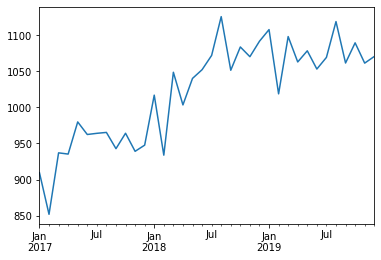

In [11]:
data['Floor Clearner'].plot()

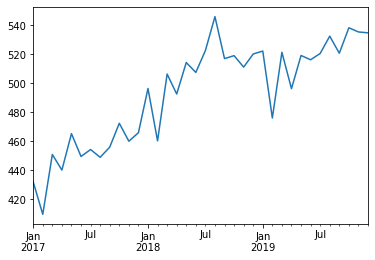

In [12]:
data['Personal Hygiene'].plot()

In [13]:
data.index = pd.to_datetime(data.index)

In [14]:
result = seasonal_decompose(data['Floor Clearner'] , model = 'additive')

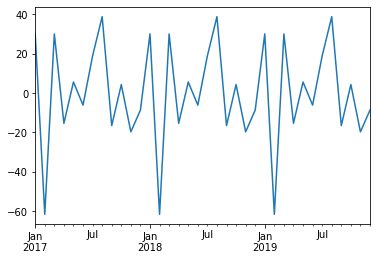

In [15]:
result.seasonal.plot()

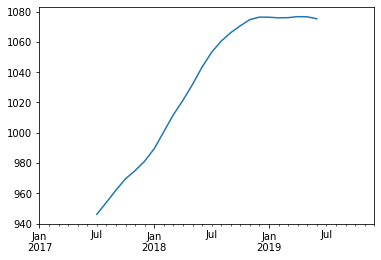

In [16]:
result.trend.plot()

In [17]:
res = adfuller(data['Floor Clearner'])

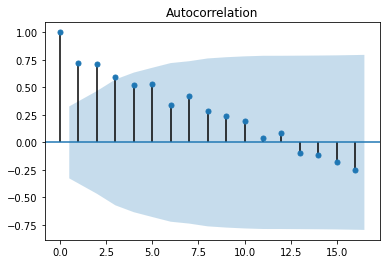

In [18]:
plot_acf(data['Floor Clearner']);

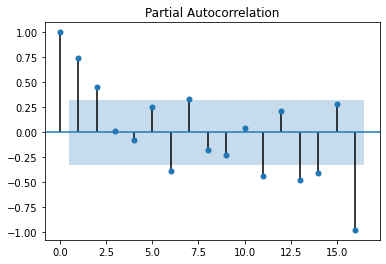

In [19]:
plot_pacf(data['Floor Clearner']);

In [20]:
X = data['Floor Clearner'].iloc[:-1]
Y = data['Floor Clearner'].iloc[1:]
X = np.array(X)
X = X.reshape(-1,1)
Y = np.array(Y).reshape(-1,1)

In [21]:
regressor = XGBRegressor()
regressor.fit(X,Y)

[16:53:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

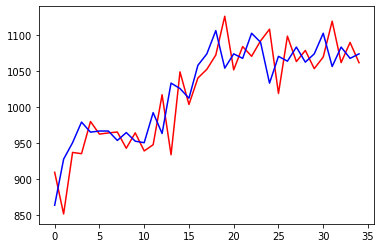

In [22]:
Y_pred = regressor.predict(X)

plt.plot(X , color = 'red')
plt.plot(Y_pred , color = 'blue')